In [3]:
 #Loading the Dataset

import pandas as pd

# Load the dataset
bank_full = pd.read_csv('../data/bank-full.csv', sep=';')

# Display the first few rows of the dataset
print(bank_full.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


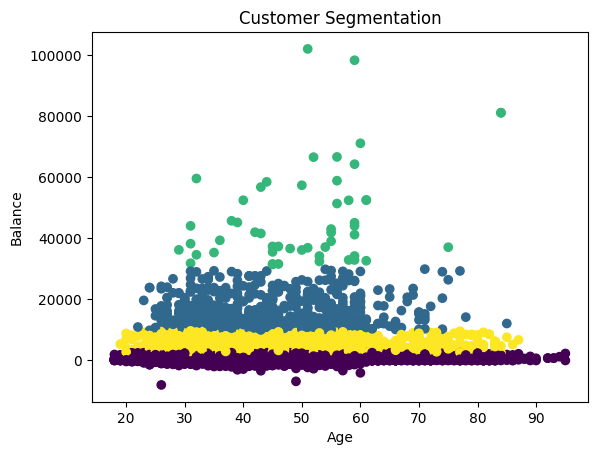

In [4]:
# Customer Segmentation 
# Objective: Perform customer segmentation based on various features.

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select features for clustering
features = bank_full[['age', 'balance', 'duration', 'campaign']]

# Apply K-means clustering
kmeans = KMeans(n_clusters=4)
bank_full['cluster'] = kmeans.fit_predict(features)

# Visualize the clusters
plt.scatter(bank_full['age'], bank_full['balance'], c=bank_full['cluster'])
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title('Customer Segmentation')
plt.show()

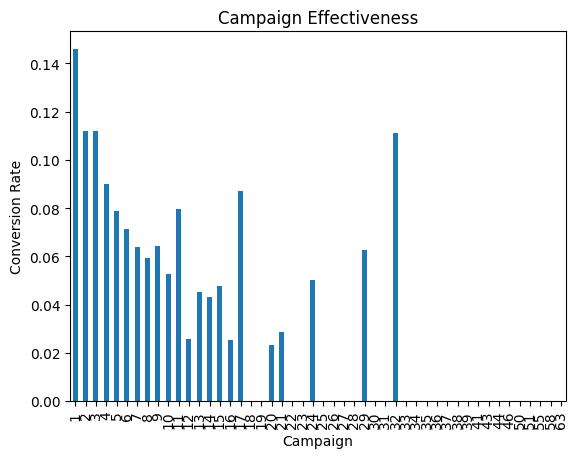

In [5]:
#  Campaign Effectiveness Analysis 
# Objective: Analyze the effectiveness of marketing campaigns.

# Calculate conversion rates
conversion_rates = bank_full.groupby('campaign')['y'].apply(lambda x: (x == 'yes').mean())

# Visualize conversion rates
conversion_rates.plot(kind='bar')
plt.xlabel('Campaign')
plt.ylabel('Conversion Rate')
plt.title('Campaign Effectiveness')
plt.show()

In [6]:
# Predictive Modeling 
# Objective: Build a predictive model to forecast customer responses.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Prepare the data
X = bank_full[['age', 'balance', 'duration', 'campaign']]
y = bank_full['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8875700383367738
[[11774   192]
 [ 1333   265]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11966
           1       0.58      0.17      0.26      1598

    accuracy                           0.89     13564
   macro avg       0.74      0.57      0.60     13564
weighted avg       0.86      0.89      0.86     13564



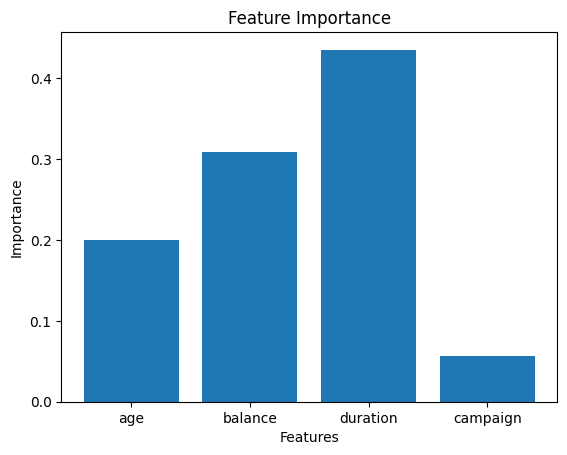

In [7]:
# Feature Importance 
# Objective: Identify important features affecting customer decisions.

from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_

# Visualize feature importances
plt.bar(X.columns, importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [8]:
# Recommendation Engine
# Objective: Develop a system for personalized marketing strategies based on customer profiles.

from sklearn.neighbors import NearestNeighbors

# Example of a simple recommendation system using Nearest Neighbors
recommendation_model = NearestNeighbors(n_neighbors=5)
recommendation_model.fit(X)

# Find similar customers
customer_index = 0  # Example customer index
distances, indices = recommendation_model.kneighbors([X.iloc[customer_index]])

# Print similar customers
print(f'Similar customers to customer {customer_index}: {indices}')

Similar customers to customer 0: [[    0   699 24612 29505 34075]]


c:\Users\DaveN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
